In [1]:
__author__ = "@Tssp"
__date__ = "03/01/2021"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2
aur = (1 + np.sqrt(5))/2
aursize = (4.3*aur, 4.3)

## ICIR: $\psi^{(b)}\Phi_{(0, 0, 4)}, \psi^{(b)}\Phi_{(4, 0, 0)}$

In [2]:
wxwy = [1, 1.05, 1.1]
ady_up = [5.708198957617527380e-01, 5.766704639003399357e-01, 5.831008618466336779e-01]
ady_down = [5.708198957617527380e-01, 5.438213446870238110e-01, 5.203446640869938689e-01]

In [3]:
#np.savetxt('Results/ICIR_q1D.txt', [wxwy, ady_up, ady_down], header='wx/wy, asc(020), asc(200)')

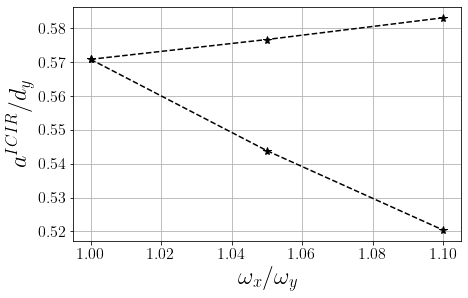

In [14]:
fig, ax = plt.subplots(figsize=aursize)
ax.plot(wxwy, ady_up, 'k--*', markersize=8)
ax.plot(wxwy, ady_down, 'k--*', markersize=8)
#ax.set_xlim(0.997, 1.254)
#ax.set_ylim(0.50, 0.59)
ax.set_xlabel('$\omega_x/\omega_y$')
ax.set_ylabel('$a^{ICIR}/d_y$')
plt.grid()
#fig.savefig('Results/Figures/ICIR_q3d.png', dpi=200)

# Comparison with Theory

In [12]:
Data_theory = np.loadtxt('Results/ICIR_q1D_Theory.txt')
wxwy_theory = Data_theory[0]
asc_020_exact = Data_theory[1]
asc_200_exact = Data_theory[2]
asc_020_C0 = Data_theory[3]
asc_200_C0 = Data_theory[4]
asc_020_C1 = Data_theory[5]
asc_200_C1 = Data_theory[6]
asc_020_C2 = Data_theory[7]
asc_200_C2 = Data_theory[8]
asc_020_config = Data_theory[9]
asc_200_config = Data_theory[10]
asc_020_config_C0 = Data_theory[11]
asc_200_config_C0 = Data_theory[12]
asc_020_config_C1 = Data_theory[13]
asc_200_config_C1 = Data_theory[14]
asc_020_config_C2 = Data_theory[15]
asc_200_config_C2 = Data_theory[16]

# Eref without coupling

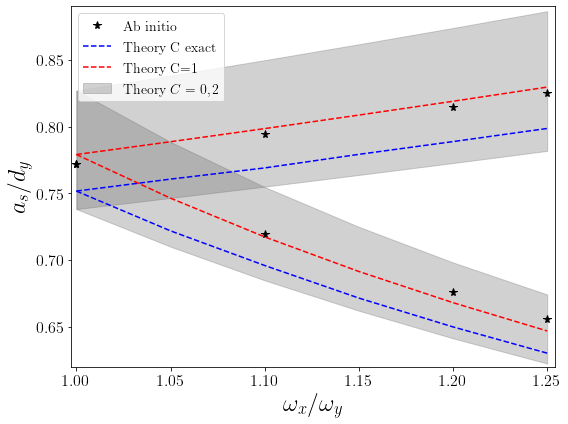

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(wxwy, asc_020, 'k*', markersize=8, label='Ab initio')
ax.plot(wxwy, asc_200, 'k*', markersize=8)
ax.plot(wxwy_theory, asc_020_exact, 'b--', markersize=8, label='Theory C exact')
ax.plot(wxwy_theory, asc_200_exact, 'b--', markersize=8)
ax.plot(wxwy_theory, asc_020_C1, 'r--', markersize=8, label='Theory C=1')
ax.plot(wxwy_theory, asc_200_C1, 'r--', markersize=8)
ax.fill_between(wxwy_theory, asc_020_C0, asc_020_C2, color='dimgray', alpha=0.3, label='Theory $C=0,2$')
ax.fill_between(wxwy_theory, asc_200_C0, asc_200_C2, color='dimgray', alpha=0.3)
ax.set_xlim(0.997, 1.254)
ax.set_ylim(0.62, 0.89)
ax.set_xlabel('$\omega_x/\omega_y$')
ax.set_ylabel('$a_{s}/d_y$')
plt.legend(fontsize=14, loc='upper left')
plt.tight_layout()
#fig.savefig('Results/Figures/ICIR_q1D_Theory_band_nocoupling.png', dpi=200, bbox_inches="tight")

# Eref with coupling

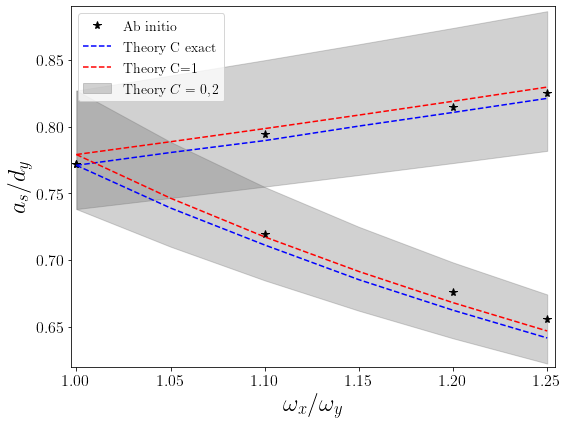

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(wxwy, asc_020, 'k*', markersize=8, label='Ab initio')
ax.plot(wxwy, asc_200, 'k*', markersize=8)
ax.plot(wxwy_theory, asc_020_config, 'b--', markersize=8, label='Theory C exact')
ax.plot(wxwy_theory, asc_200_config, 'b--', markersize=8)
ax.plot(wxwy_theory, asc_020_config_C1, 'r--', markersize=8, label='Theory C=1')
ax.plot(wxwy_theory, asc_200_config_C1, 'r--', markersize=8)
ax.fill_between(wxwy_theory, asc_020_config_C0, asc_020_config_C2, color='dimgray', alpha=0.3, label='Theory $C=0,2$')
ax.fill_between(wxwy_theory, asc_200_config_C0, asc_200_config_C2, color='dimgray', alpha=0.3)
ax.set_xlim(0.997, 1.254)
ax.set_ylim(0.62, 0.89)
ax.set_xlabel('$\omega_x/\omega_y$')
ax.set_ylabel('$a_{s}/d_y$')
plt.legend(fontsize=14, loc='upper left')
plt.tight_layout()
#fig.savefig('Results/Figures/ICIR_q1D_Theory_band_coupling.png', dpi=200, bbox_inches="tight")

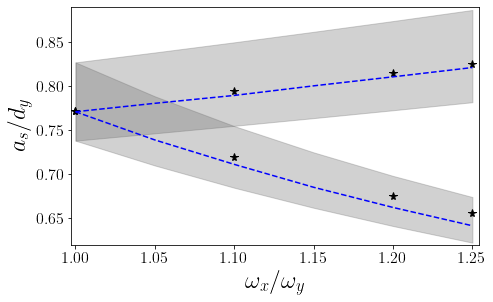

In [25]:
fig, ax = plt.subplots(figsize=aursize)
ax.plot(wxwy, asc_020, 'k*', markersize=8, label='Ab initio')
ax.plot(wxwy, asc_200, 'k*', markersize=8)
ax.plot(wxwy_theory, asc_020_config, 'b--', markersize=8, label='Theory C exact')
ax.plot(wxwy_theory, asc_200_config, 'b--', markersize=8)
ax.fill_between(wxwy_theory, asc_020_config_C0, asc_020_config_C2, color='dimgray', alpha=0.3, label='Theory $C=0,2$')
ax.fill_between(wxwy_theory, asc_200_config_C0, asc_200_config_C2, color='dimgray', alpha=0.3)
ax.set_xlim(0.997, 1.254)
ax.set_ylim(0.62, 0.89)
ax.set_xlabel('$\omega_x/\omega_y$')
ax.set_ylabel('$a_{s}/d_y$')
plt.tight_layout()
#fig.savefig('Results/Figures/ICIR_q1D_Theory_band_coupling_final.png', dpi=200, bbox_inches="tight")

In [16]:
from sklearn.metrics import mean_squared_error

In [20]:
print('MSE between ab initio and C=1 without coupling: ', mean_squared_error([asc_020, asc_200], [asc_020_C1, asc_200_C1]))
print('MSE between ab initio and C exact without coupling: ', mean_squared_error([asc_020, asc_200], [asc_020_exact, asc_200_exact]))
print('MSE between C=1 and C exact without coupling: ', mean_squared_error([asc_020_C1, asc_200_C1], [asc_020_exact, asc_200_exact]))

MSE between ab initio and C=1 without coupling:  4.484031270651687e-05
MSE between ab initio and C exact without coupling:  0.0005522264498721373
MSE between C=1 and C exact without coupling:  0.0006624303410782821


In [21]:
print('MSE between ab initio and C=1 with coupling: ', mean_squared_error([asc_020, asc_200], [asc_020_config_C1, asc_200_config_C1]))
print('MSE between ab initio and C exact with coupling: ', mean_squared_error([asc_020, asc_200], [asc_020_config, asc_200_config]))
print('MSE between C=1 and C exact with coupling: ', mean_squared_error([asc_020_config_C1, asc_200_config_C1], [asc_020_config, asc_200_config]))

MSE between ab initio and C=1 with coupling:  4.484031270852053e-05
MSE between ab initio and C exact with coupling:  5.703507722137706e-05
MSE between C=1 and C exact with coupling:  5.6133673203483864e-05
